In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scola

In [46]:
# Ticker names
ticker_names = pd.read_csv("https://raw.githubusercontent.com/skojaku/scola/develop/data/ticker-names.csv", sep="\t")

# Load the data
log_return = pd.read_csv("https://raw.githubusercontent.com/skojaku/scola/develop/data/sp500-log-return.csv", sep="\t")
#log_return = pd.read_csv("data/sp500-log-return.csv", sep="\t")

L = log_return.shape[0]
N = log_return.shape[1]
node_names = log_return.columns 
C_samp = log_return.corr().values
print(C_samp.shape,L)

(488, 488) 1006


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


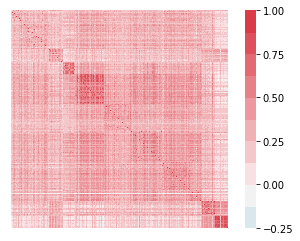

In [53]:
import matplotlib.colors as colors

def plot_corr(A, ax = None):
  
    min_w = np.min(A)
    max_w = np.max(A)
    disc_min_w = 0.125 * np.floor(min_w / 0.125)
    disc_max_w = 0.125 * np.ceil(max_w / 0.125)
    bounds = np.linspace( disc_min_w, disc_max_w, np.round( (disc_max_w - disc_min_w) / 0.125) + 1 )
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(A, cmap=cmap,\
                     center = 0,\
                     vmax=max_w,\
                     vmin=min_w,\
                     square=True,\
                     mask=A==0,\
                     norm=norm,\
                     ax = ax\
                    )
  
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

plot_corr(C_samp)
plt.savefig("docs/source/fig/C_samp-sp500.png", bbox_inches="tight", dpi=300)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


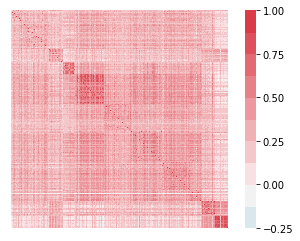

In [32]:
# Generate networks with different null models
null_models = ["white-noise", "hqs", "config"]

import pickle
with open("result.pickle", "rb") as f:
    Results = pickle.load(f)
    
#Results = {}
#for null_model in null_models:
#    W, C_null, selected_null_model, EBIC, construct_from, all_networks\
#        = scola.corr2net.transform(C_samp,\
#                                   L=L,\
#                                   disp=True,\
#                                   null_model = null_model)
#    
#    Results[null_model] = {"W":W, "C_null":C_null, "EBIC":EBIC, "all_networks":all_networks}


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


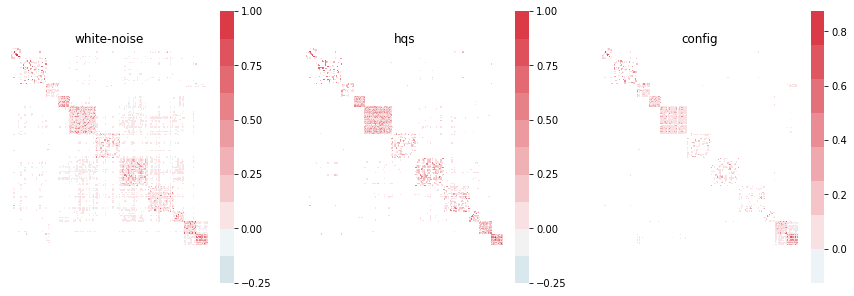

In [33]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
for i, null_model in enumerate( null_models ):
    ax = plot_corr(Results[null_model]["W"], ax = axes[i])
    ax.set_title(null_model)
plt.show()

In [7]:
#import pickle
#with open("result.pickle", "wb") as f:
#    pickle.dump(Results, f)

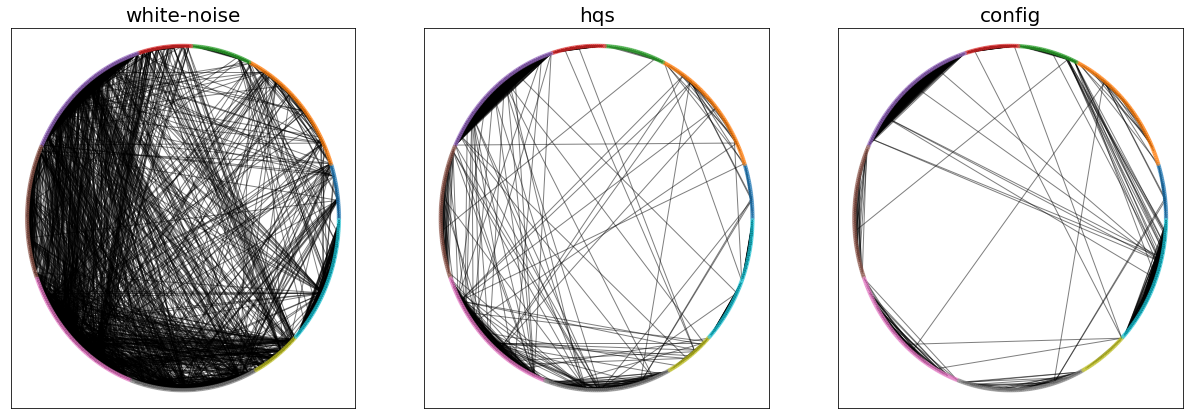

In [34]:
%reload_ext autoreload
%autoreload
import networkx as nx
import matplotlib

# Compute the node position
G = nx.from_numpy_array(np.zeros_like(C_samp))
pos = nx.circular_layout(G)

# Compute the node colour
gics = ticker_names.set_index("name").loc[node_names]["gics"]
_,group_id = np.unique(gics, return_inverse = True )

# Plot the networks
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (21, 7))
for i, null_model in enumerate( null_models ):
    G = nx.from_numpy_array(Results[null_model]["W"])
    nx.draw_networkx_nodes(G, pos=pos, node_size=12, cmap="tab10", alpha = 0.5, ax = axes[i], node_color = group_id)
    nx.draw_networkx_edges(G, pos=pos, connectionstyle='arc3,rad=0.1', alpha = 0.5, ax=axes[i])
    axes[i].set_title(null_model, fontsize = 20)


In [9]:
import networkx as nx